Epoch 1/50


C:\Users\SentDyem\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


298/298 [==============================] - 1s 1ms/step - loss: 1000.9741 - accuracy: 0.1614 - val_loss: 306.3026 - val_accuracy: 0.1173
Epoch 2/50
298/298 [==============================] - 0s 1ms/step - loss: 208.4661 - accuracy: 0.1933 - val_loss: 177.1137 - val_accuracy: 0.2397
Epoch 3/50
298/298 [==============================] - 0s 1ms/step - loss: 164.6678 - accuracy: 0.2162 - val_loss: 134.9177 - val_accuracy: 0.1190
Epoch 4/50
298/298 [==============================] - 0s 1ms/step - loss: 136.3663 - accuracy: 0.2337 - val_loss: 149.4184 - val_accuracy: 0.4111
Epoch 5/50
298/298 [==============================] - 0s 1ms/step - loss: 119.4860 - accuracy: 0.2489 - val_loss: 119.8125 - val_accuracy: 0.1562
Epoch 6/50
298/298 [==============================] - 0s 1ms/step - loss: 127.4292 - accuracy: 0.2671 - val_loss: 47.3205 - val_accuracy: 0.2860
Epoch 7/50
298/298 [==============================] - 0s 1ms/step - loss: 87.0866 - accuracy: 0.3071 - val_loss: 111.9471 - val_accurac

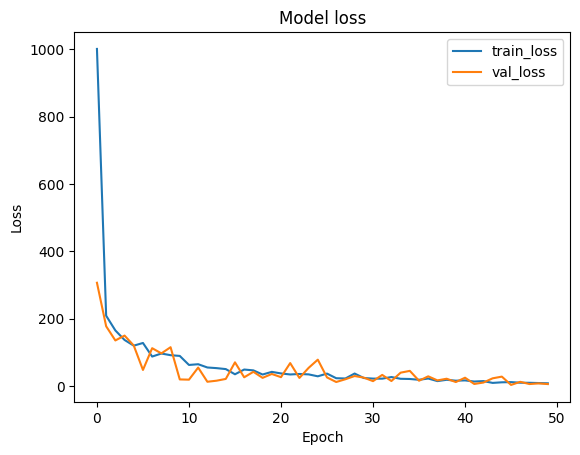

128/128 [==============================] - 0s 559us/step
Accuracy: 0.688050930460333
Precision: 0.7534876491246877
Confusion matrix:
[[210   0 171   0   0   1  13]
 [  0 151  10   0   0   0   0]
 [ 54   0 421   0   0   2   2]
 [  0   0   0 775   0 234  34]
 [ 88   0  86  17 178   0 219]
 [ 11   0   0   0   0 604   4]
 [ 54   0   0  28   0 246 471]]


In [24]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

data = pd.read_excel('dataset.xlsx')

X = data.drop('Class', axis=1)
y = data[['Class']]

le=LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    epochs=50, batch_size=32,
                    validation_data=(X_test, y_test))

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

y_test_pred = np.argmax(model.predict(X_test), axis=-1)

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)

confusion = confusion_matrix(y_test, y_test_pred)

print("Confusion matrix:")
print(confusion)
